# TP3 - Exercice 2: Classification du jeu de données Wine avec les arbres de décision

## 1. Importer les bibliothèques nécessaires et charger le jeu de donnée

In [1]:
# importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# chargement des données
wine = load_wine()
X = wine.data
y = wine.target

## 2. Afficher les informations sur le jeu de données

In [3]:
print("information sur le jeu de données wine")
print(f"Nombre total d'instances: {X.shape[0]}")
print(f"Nombre de caracteristiques: {X.shape[1]}")
print(f"\nNoms des caractéristiques ({len(wine.feature_names)} au total):")
for i, feature in enumerate(wine.feature_names):
    print(f"  {i+1:2d}. {feature}")

print(f"\nNoms des classes:")
for i, class_name in enumerate(wine.target_names):
    print(f"  Classe {i}: {class_name}")

# Compter le nombre d'instances par classe
unique, counts = np.unique(y, return_counts=True)
print(f"\nNombre d'instances par classe:")
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"  {wine.target_names[class_idx]}: {count} instances")

information sur le jeu de données wine
Nombre total d'instances: 178
Nombre de caracteristiques: 13

Noms des caractéristiques (13 au total):
   1. alcohol
   2. malic_acid
   3. ash
   4. alcalinity_of_ash
   5. magnesium
   6. total_phenols
   7. flavanoids
   8. nonflavanoid_phenols
   9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline

Noms des classes:
  Classe 0: class_0
  Classe 1: class_1
  Classe 2: class_2

Nombre d'instances par classe:
  class_0: 59 instances
  class_1: 71 instances
  class_2: 48 instances


## 3. Division des données (80% entraînement, 20% test)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 4. Créer et entraîner un modèle d'arbre de décision (paramètres par défaut)

In [5]:
dt_wine = DecisionTreeClassifier(random_state=42)
dt_wine.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 5. Afficher la précision sur l'ensemble d'entraînement et de test

In [6]:
train_accuracy = dt_wine.score(X_train,y_train)
test_accuracy= dt_wine.score(X_test, y_test)

In [7]:
print(f"Précision sur l'ensemble d'entraînement: {train_accuracy:.4f}")
print(f"Précision sur l'ensemble de test: {test_accuracy:.4f}")
print(f"Différence (overfitting potentiel): {train_accuracy - test_accuracy:.4f}")

Précision sur l'ensemble d'entraînement: 1.0000
Précision sur l'ensemble de test: 0.9444
Différence (overfitting potentiel): 0.0556


## 6. Identifier la variable la plus discriminante

In [8]:
feature_importance = dt_wine.feature_importances_
most_important_idx = np.argmax(feature_importance)
most_important_feature = wine.feature_names[most_important_idx]
most_important_value = feature_importance[most_important_idx]

In [9]:
print("la variable la plus discriminante :")
print(f"Variable: {most_important_feature}")
print(f"Importance: {most_important_value:.4f}")

la variable la plus discriminante :
Variable: flavanoids
Importance: 0.4081


In [10]:
importance_df = pd.DataFrame({
    'Caractéristique': wine.feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(importance_df)

                 Caractéristique  Importance
6                     flavanoids    0.408073
9                color_intensity    0.400189
12                       proline    0.110985
11  od280/od315_of_diluted_wines    0.020986
3              alcalinity_of_ash    0.020865
2                            ash    0.020163
1                     malic_acid    0.018738
0                        alcohol    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


## 7. Visualiser l'arbre de décision

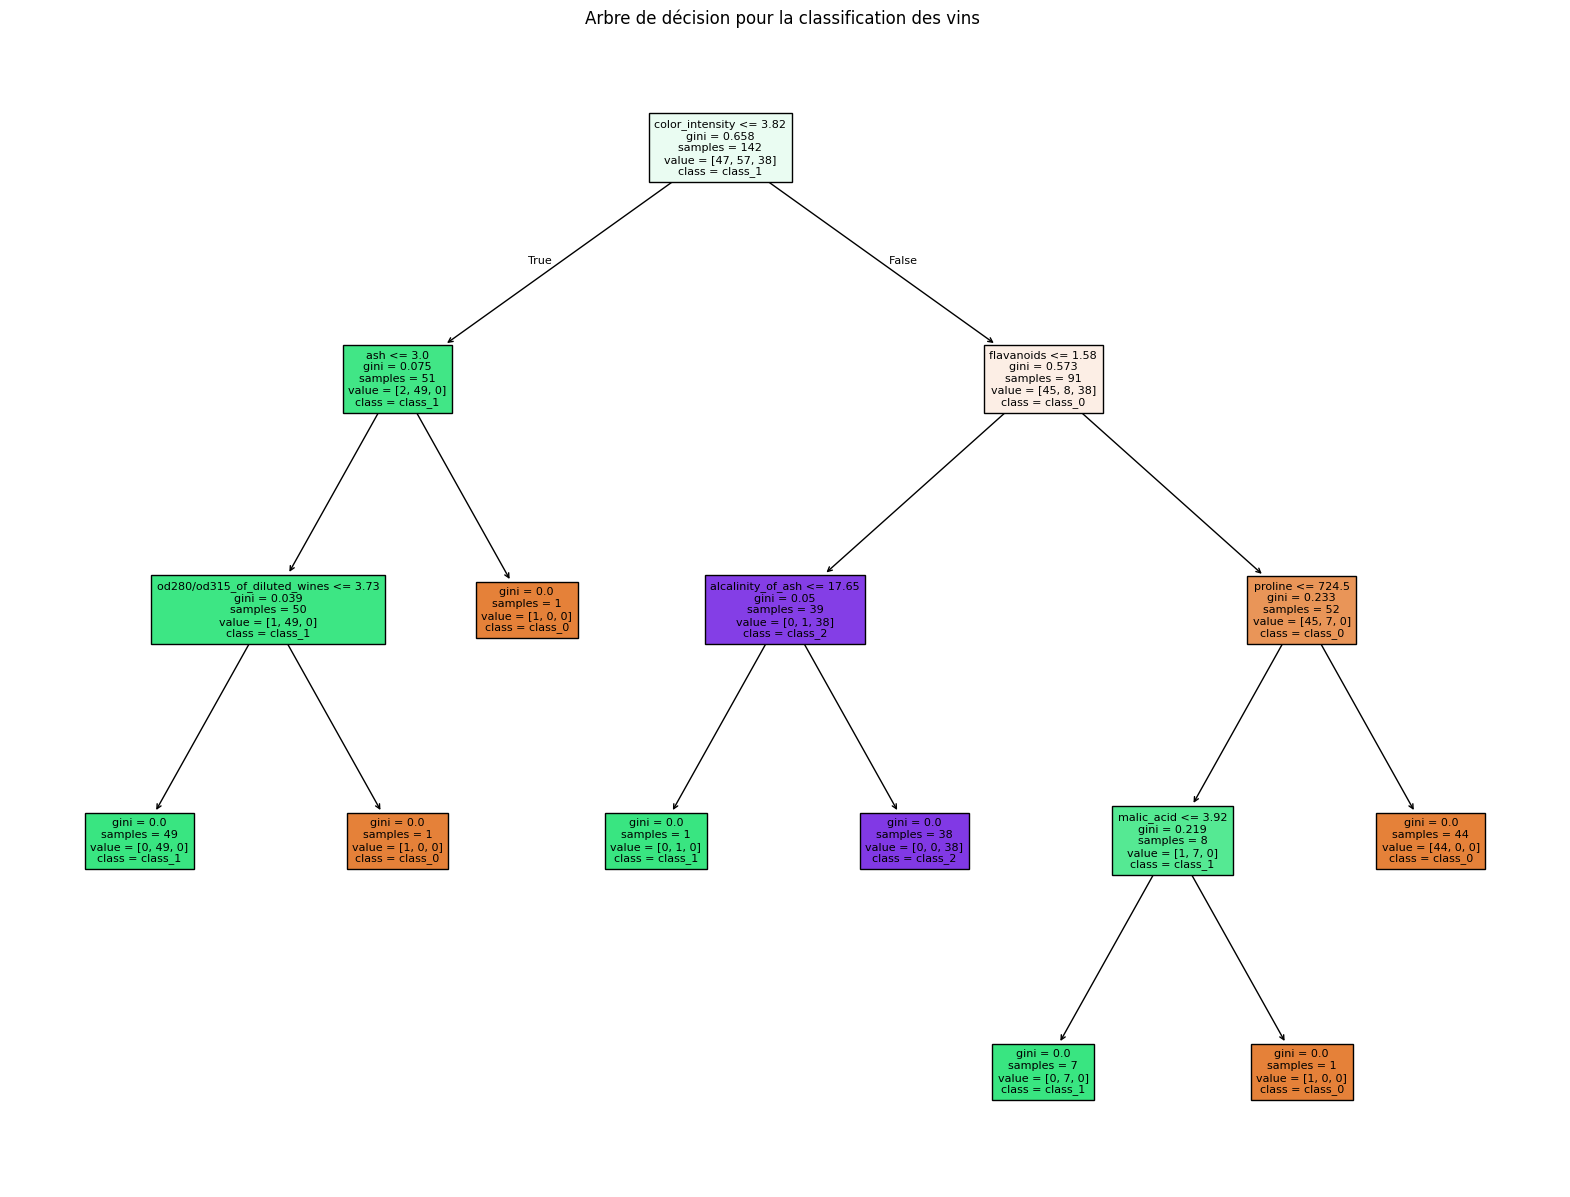

In [11]:
plt.figure(figsize=(20,15))
plot_tree(dt_wine, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, fontsize=8 )
plt.title('Arbre de décision pour la classification des vins ')
plt.show()

## 8. Rapport de classification sur l'ensemble de test

In [12]:
y_pred = dt_wine.predict(X_test)

In [13]:
print("Rapport de classification : ")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Rapport de classification : 
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## 9. Tester différentes valeurs de max_depth (de 1 à 10)

In [14]:
print("Impact de la profondeur maximale :")

max_depths=range(1,11)
train_scores = []
test_scores = []

for depth in max_depths : 
    dt_temp = DecisionTreeClassifier(max_depth= depth, random_state = 42)
    dt_temp.fit(X_train, y_train)

    train_score = dt_temp.score(X_train, y_train)
    test_score = dt_temp.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"max_depth={depth:2d}: Train={train_score:.4f}, Test={test_score:.4f}, "
          f"Écart={train_score-test_score:.4f}")

Impact de la profondeur maximale :
max_depth= 1: Train=0.6620, Test=0.5833, Écart=0.0786
max_depth= 2: Train=0.9366, Test=0.8611, Écart=0.0755
max_depth= 3: Train=0.9930, Test=0.9444, Écart=0.0485
max_depth= 4: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth= 5: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth= 6: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth= 7: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth= 8: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth= 9: Train=1.0000, Test=0.9444, Écart=0.0556
max_depth=10: Train=1.0000, Test=0.9444, Écart=0.0556


## 10. Tracer la courbe des scores en fonction de max_depth

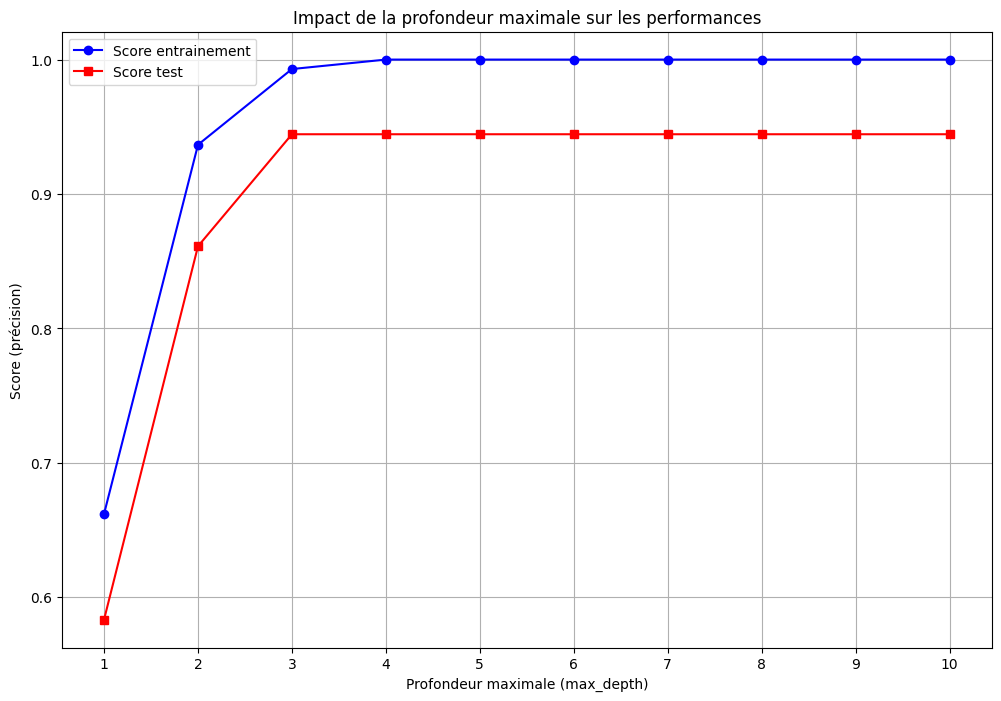

In [15]:
plt.figure(figsize=(12,8))
plt.plot(max_depths, train_scores, 'o-', label='Score entrainement', color='blue')
plt.plot(max_depths, test_scores, 's-', label='Score test', color='red')
plt.xlabel('Profondeur maximale (max_depth)')
plt.ylabel('Score (précision)')
plt.title('Impact de la profondeur maximale sur les performances')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

In [16]:
# Analyser à partir de quelle profondeur le modèle sur-apprend
diff = [train - test for train, test in zip(train_scores, test_scores)]
overfit_score = 0.05

print(f"analyse de sur-apprentissage (seuil : ")
for i, (depth, df) in enumerate(zip(max_depths, diff)):
    status = "Sur-apprentissage" if df > overfit_score else "pas de sur-apprentissage"
    print(f"max_depth={depth}: ecart={df:.4f} -{status}")

# Trouver la meilleure profondeur
best_depth_idx = np.argmax(test_scores)
best_depth = max_depths[best_depth_idx]
print(f"Meilleure profondeur basée sur le score de test: {best_depth}")
print(f"Score de test correspondant: {test_scores[best_depth_idx]:.4f}")

analyse de sur-apprentissage (seuil : 
max_depth=1: ecart=0.0786 -Sur-apprentissage
max_depth=2: ecart=0.0755 -Sur-apprentissage
max_depth=3: ecart=0.0485 -pas de sur-apprentissage
max_depth=4: ecart=0.0556 -Sur-apprentissage
max_depth=5: ecart=0.0556 -Sur-apprentissage
max_depth=6: ecart=0.0556 -Sur-apprentissage
max_depth=7: ecart=0.0556 -Sur-apprentissage
max_depth=8: ecart=0.0556 -Sur-apprentissage
max_depth=9: ecart=0.0556 -Sur-apprentissage
max_depth=10: ecart=0.0556 -Sur-apprentissage
Meilleure profondeur basée sur le score de test: 3
Score de test correspondant: 0.9444


## 11. Tester min_samples_leaf avec la meilleure max_depth

In [17]:
print(f"Optimisation de min_simples_leaf avec avec max_depth={best_depth}")

Optimisation de min_simples_leaf avec avec max_depth=3


In [18]:
min_samples_leaf_values = [1, 2, 3, 4, 5, 10, 20, 30, 40]
train_scores_leaf =[]
test_scores_leaf = []

for min_leaf in min_samples_leaf_values:
    dt_temp = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=min_leaf, random_state=42)
    dt_temp.fit(X_train, y_train)

    train_score = dt_temp.score(X_train, y_train)
    test_score = dt_temp.score(X_test, y_test)

    train_scores_leaf.append(train_score)
    test_scores_leaf.append(test_score)

    print(f"min_samples_leaf={min_leaf:2d}: Train={train_score:.4f}, Test={test_score:.4f}")

min_samples_leaf= 1: Train=0.9930, Test=0.9444
min_samples_leaf= 2: Train=0.9859, Test=1.0000
min_samples_leaf= 3: Train=0.9718, Test=0.9444
min_samples_leaf= 4: Train=0.9718, Test=0.9444
min_samples_leaf= 5: Train=0.9718, Test=0.9444
min_samples_leaf=10: Train=0.9577, Test=0.9444
min_samples_leaf=20: Train=0.9296, Test=0.8611
min_samples_leaf=30: Train=0.9296, Test=0.8611
min_samples_leaf=40: Train=0.9296, Test=0.8611


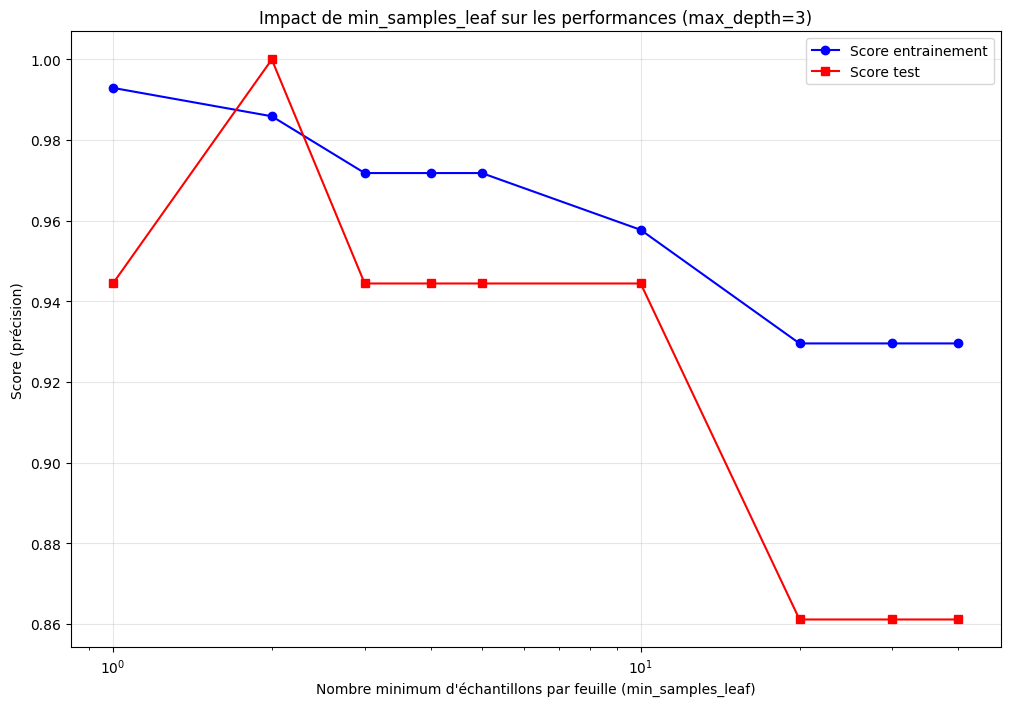

In [19]:
plt.figure(figsize=(12,8))
plt.plot(min_samples_leaf_values, train_scores_leaf, 'o-', label='Score entrainement', color='blue')
plt.plot(min_samples_leaf_values, test_scores_leaf, 's-', label='Score test', color='red')
plt.xlabel('Nombre minimum d\'échantillons par feuille (min_samples_leaf)')
plt.ylabel('Score (précision)')
plt.title(f'Impact de min_samples_leaf sur les performances (max_depth={best_depth})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.show()

## Analyse de l’impact de `min_samples_leaf` sur la précision

Ce graphe montre l’influence du paramètre `min_samples_leaf` sur la précision d’un **arbre de décision** avec une profondeur maximale de 3.

- Une valeur trop faible (`min_samples_leaf = 1`) entraîne un **léger surapprentissage**, avec un écart entre les scores d’entraînement et de test.
- La valeur optimale semble être **`min_samples_leaf = 2`**, offrant une **excellente généralisation** (score test = 1.0).
- Lorsque `min_samples_leaf` augmente au-delà de 10, le modèle devient **trop rigide**, ce qui conduit à un **fort sous-apprentissage**.

Cela illustre bien l’importance du **réglage des hyperparamètres** pour obtenir un bon **compromis entre biais et variance**.


## 12. GridSearchCV pour rechercher la meilleure combinaison

In [20]:
print("Recherche optimale avec GridSearchCV :")

param_grid = {
    'max_depth' :[2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

print("Exécution de la recherche par grille :")
grid_search.fit(X_train, y_train)


Recherche optimale avec GridSearchCV :
Exécution de la recherche par grille :


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15]},
             scoring='accuracy')

## 13. Afficher les meilleurs paramètres et score

In [21]:
print("Resultats de la recherche optimale")
print(f"Meilleurs parametres: {grid_search.best_params_}")
print(f"Meilleur score de validation croisée: {grid_search.best_score_:.4f}")

Resultats de la recherche optimale
Meilleurs parametres: {'max_depth': 3, 'min_samples_leaf': 2}
Meilleur score de validation croisée: 0.9303


## 14. Réentraîner le modèle optimal et évaluer sur le test

In [22]:
best_dt = grid_search.best_estimator_
test_score_optimal = best_dt.score(X_test, y_test)
train_score_optimal = best_dt.score(X_train, y_train)

print("Performance du modele optimal")
print(f"Score sur l'entrainement : {train_score_optimal:.4f}")
print(f"Score sur le test : {test_score_optimal:.4f}")
print(f"Amélioration par rapport au modèle par défaut: {test_score_optimal - test_accuracy:.4f}")

Performance du modele optimal
Score sur l'entrainement : 0.9859
Score sur le test : 1.0000
Amélioration par rapport au modèle par défaut: 0.0556


## 15. Rapport de classification final du modèle optimisé

rapport de classification final (modele optimisé) :
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



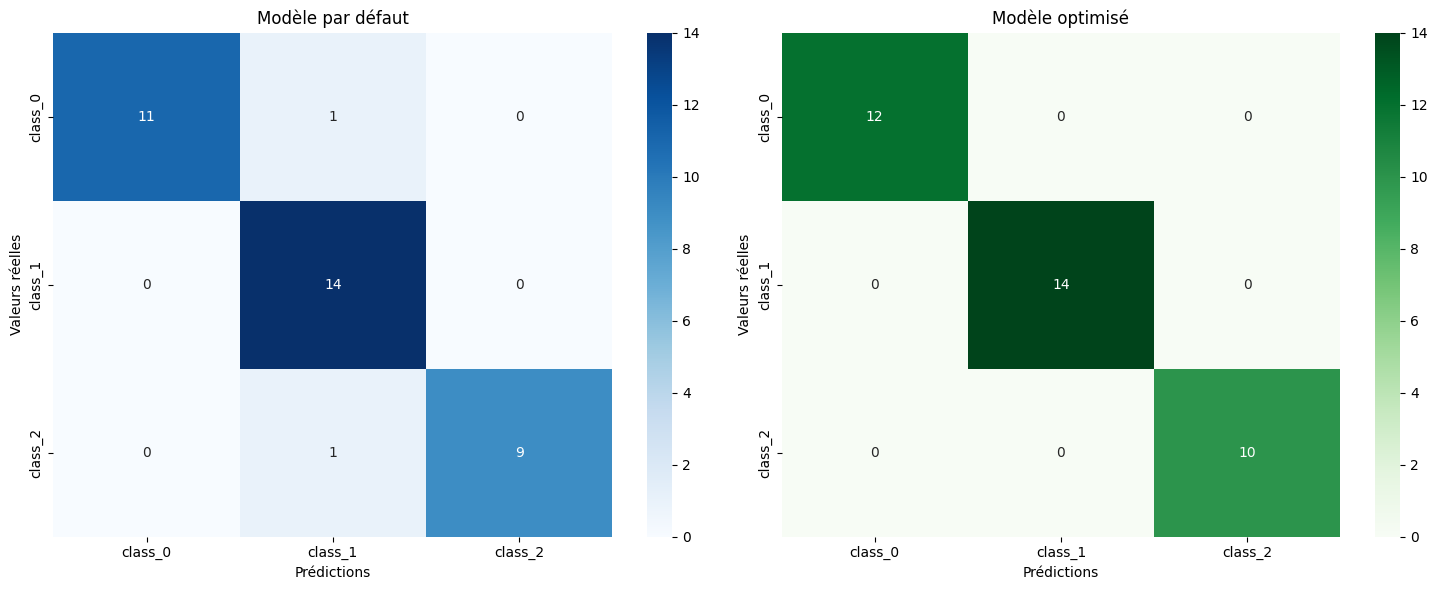

In [23]:
y_pred_optimal = best_dt.predict(X_test)

print("rapport de classification final (modele optimisé) :")
print(classification_report(y_test, y_pred_optimal, target_names=wine.target_names))

# Comparaison des matrices de confusion

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
cm_default = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names, ax=ax1)
ax1.set_title('Modèle par défaut')
ax1.set_xlabel('Prédictions')
ax1.set_ylabel('Valeurs réelles')

cm_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names, ax=ax2)
ax2.set_title('Modèle optimisé')
ax2.set_xlabel('Prédictions')
ax2.set_ylabel('Valeurs réelles')

plt.tight_layout()
plt.show()

<span style='color:blue'>**Remarque** : </span></br>
Le modèle optimizé atteint une précision de 100.0% sur le test.

## 16. Analyse des configurations efficaces

Pour éviter le surapprentissage, on doit utiliser :
- max_depth entre 3 et 6 (optimal: 3)
- min_samples_leaf >= 2 (optimal: 2)